# Comprehensive Cryptocurrency Analysis

This notebook provides a professional, data-driven analysis of major cryptocurrencies. It covers risk/return (Sharpe ratios), price vs. all-time high, dominance metrics, functional groupings (Layer 1s, DeFi, AI, etc.), and advanced visualizations for portfolio and market insights.

## Table of Contents
1. Introduction & Methodology
2. Data Import & Ticker Groupings
3. Risk/Return Analysis (Sharpe Ratios)
4. Price vs. All-Time High (ATH)
5. Dominance Metrics (BTC, ETH, etc.)
6. Functional Group Analysis (Layer 1s, DeFi, AI, etc.)
7. Advanced Visualizations
8. Insights & Recommendations

## 1. Introduction & Methodology

This notebook analyzes the top cryptocurrencies by market cap and function, using professional risk/return metrics, dominance calculations, and group-based analytics. All code is modular and ready for institutional review.

In [13]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os
plt.style.use('dark_background')

risk_free_rate = 0.045  # US 10-year Treasury yield, 2025

## 2. Data Import & Ticker Groupings

Define tickers and groupings for Layer 1s, DeFi, AI, NFTs, and more.

In [14]:
# Define subsector dictionaries
layer1_tickers = {
    'Bitcoin': 'BTC-USD',
    'Ethereum': 'ETH-USD',
    'Solana': 'SOL-USD',
    'Ripple': 'XRP-USD',
    'Avalanche': 'AVAX-USD',
    'Polkadot': 'DOT-USD',
    'Cardano': 'ADA-USD',
    'Near Protocol': 'NEAR-USD',
    'Sui': 'SUI20947-USD',
    'Hedera': 'HBAR-USD',
    'Celestia': 'TIA-USD',  # Modular blockchain/data availability
    'Sei Network': 'SEI-USD',  # High-performance trading L1
}
defi_tickers = {
    'Uniswap': 'UNI-USD',
    'Ondo': 'ONDO-USD',
    'Compound': 'COMP-USD',
    'Lido': 'LDO-USD',
    'Hyperliquid':'HYPE32196-USD',
    'Aave': 'AAVE-USD',
    'Raydium': 'RAY-USD',
    'Morpho': 'MORPHO34104-USD',
    'Aerodrome': 'AERO-USD',
    'Curve': 'CRV-USD',
    'Orca': 'ORCA-USD',
    'Drift': 'DRIFT31278-USD',
    'Pendle': 'PENDLE-USD',  # Yield trading protocol
    'Ethena': 'ENA-USD',     # Synthetic dollar protocol
}
ai_tickers = {
    'Fetch.ai': 'FET-USD',
    'Bittensor': 'TAO22974-USD',
    'Grass': 'GRASS32956-USD',
    'Render': 'RENDER-USD',
    'Graph': 'GRT6719-USD',
    'Worldcoin': 'WLD-USD',  # Biometric identity + AI
    'Akash Network': 'AKT-USD',  # Decentralized AI compute marketplace
    'Numeraire': 'NMR-USD', 
}
meme_tickers = {
    'Bonk': 'BONK-USD',
    'Pepe': 'PEPE24478-USD',
    'Dogecoin': 'DOGE-USD',
    'PudgyPenguins': 'PENGU34466-USD',
    'GigaChad': 'GIGA-USD',
    'Dogwifhat': 'WIF-USD',  # Solana meme coin with growing community
    'Book of Meme': 'BOME-USD',  # Notable for viral meme culture
}
oracle_tickers = {
    'Chainlink': 'LINK-USD',
    'Pyth Network': 'PYTH-USD',  # Fast oracle on Solana for DeFi
}

other_tickers = {
    'Helium': 'HNT-USD',
    'Tensor': 'TNSR-USD',
    'Ronin': 'RON14101-USD',
    'EigenLayer': 'EIGEN-USD',  # Restaking protocol
    'Wormhole': 'W-USD',        # Cross-chain messaging
    'Jupiter': 'JUP-USD',       # Solana DEX aggregator
}

# Combine all subsectors into one dictionary for download
crypto_tickers = {}
for d in [layer1_tickers, defi_tickers, ai_tickers, meme_tickers, oracle_tickers, other_tickers]:
    crypto_tickers.update(d)

start_date = '2017-01-01'
end_date = datetime.today().strftime('%Y-%m-%d')
prices = yf.download(list(crypto_tickers.values()), start=start_date, end=end_date)['Close']
prices = prices.ffill().dropna(how='all').dropna(axis=1, how='all')
display(prices.tail(3))

C:\Users\saris\AppData\Local\Temp\ipykernel_31888\2469228084.py:72: FutureWarning: YF.download() has changed argument auto_adjust default to True
  prices = yf.download(list(crypto_tickers.values()), start=start_date, end=end_date)['Close']
[*********************100%***********************]  49 of 49 completed


Ticker,AAVE-USD,ADA-USD,AERO-USD,AKT-USD,AVAX-USD,BOME-USD,BONK-USD,BTC-USD,COMP-USD,CRV-USD,...,SOL-USD,SUI20947-USD,TAO22974-USD,TIA-USD,TNSR-USD,UNI-USD,W-USD,WIF-USD,WLD-USD,XRP-USD
Date,,,,,,,,,,,,,,,,,,,,,
2025-07-16,323.355103,0.764549,0.000232,1.396844,22.669434,0.002145,0.000039,118738.507812,0.0,0.922237,...,173.708481,3.948388,431.316925,1.997103,0.149353,0.000163,0.086616,1.080849,1.108316,3.041405
2025-07-17,321.209106,0.823785,0.000243,1.383040,23.859947,0.002318,0.000035,119289.843750,0.0,1.011483,...,175.793045,4.012910,422.088135,1.943666,0.147419,0.000163,0.092476,1.070050,1.106989,3.495129
2025-07-18,324.977570,0.815857,0.000220,1.373035,23.524817,0.002291,0.000032,118003.226562,0.0,0.982140,...,177.381973,3.784848,411.972107,1.961029,0.144599,0.000163,0.088665,1.011789,1.138991,3.418212


In [15]:
time_intervals = ['1d', '1h', '15m', '5m', '1m']

for time_interval in time_intervals:
    print(f"📈 Downloading {time_interval} data...")
    interval_prices = yf.download(list(crypto_tickers.values()), period = 'max', interval=time_interval)
    interval_prices = interval_prices.ffill().dropna(how='all').dropna(axis=1, how='all')
    print('Date range:', interval_prices.index.min(), 'to', interval_prices.index.max())
    print('Num rows:', len(interval_prices))
    # create or append to csv in ./data/crypto/
    csv_filename = f"../data/crypto/crypto_prices_{time_interval}.csv"
    if not os.path.exists(csv_filename):
        interval_prices.to_csv(csv_filename)
    else:
        # append and drop duplicates
        prev_data = pd.read_csv(csv_filename, index_col=0)
        joined_data = pd.concat([prev_data, interval_prices], axis = 0).drop_duplicates()
        joined_data.to_csv(csv_filename)

C:\Users\saris\AppData\Local\Temp\ipykernel_31888\3895733638.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  interval_prices = yf.download(list(crypto_tickers.values()), period = 'max', interval=time_interval)


📈 Downloading 1d data...


[*********************100%***********************]  49 of 49 completed


Date range: 2014-09-17 00:00:00 to 2025-07-19 00:00:00
Num rows: 3959


C:\Users\saris\AppData\Local\Temp\ipykernel_31888\3895733638.py:15: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245) have mixed types. Specify dtype opti

📈 Downloading 1h data...


C:\Users\saris\AppData\Local\Temp\ipykernel_31888\3895733638.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  interval_prices = yf.download(list(crypto_tickers.values()), period = 'max', interval=time_interval)
[*********************100%***********************]  49 of 49 completed

2 Failed downloads:
['COMP-USD']: YFPricesMissingError('possibly delisted; no price data found  (1h 2023-07-20 14:47:18+00:00 -> 2025-07-19 14:47:13+00:00)')
['GIGA-USD']: YFPricesMissingError('possibly delisted; no price data found  (1h 2023-07-20 14:47:21+00:00 -> 2025-07-19 14:47:16+00:00)')


Date range: 2023-07-20 14:00:00+00:00 to 2025-07-19 14:00:00+00:00
Num rows: 17519


C:\Users\saris\AppData\Local\Temp\ipykernel_31888\3895733638.py:15: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235) have mixed types. Specify dtype option on import or set low_memory=False.
  

📈 Downloading 15m data...


C:\Users\saris\AppData\Local\Temp\ipykernel_31888\3895733638.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  interval_prices = yf.download(list(crypto_tickers.values()), period = 'max', interval=time_interval)
[*********************100%***********************]  49 of 49 completed

3 Failed downloads:
['COMP-USD', 'UNI-USD']: YFPricesMissingError('possibly delisted; no price data found  (15m 2025-05-20 14:47:41+00:00 -> 2025-07-19 14:47:36+00:00)')
['GIGA-USD']: YFPricesMissingError('possibly delisted; no price data found  (15m 2025-05-20 14:47:42+00:00 -> 2025-07-19 14:47:37+00:00)')


Date range: 2025-05-20 14:45:00+00:00 to 2025-07-19 14:45:00+00:00
Num rows: 5761


C:\Users\saris\AppData\Local\Temp\ipykernel_31888\3895733638.py:15: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230) have mixed types. Specify dtype option on import or set low_memory=False.
  prev_data = pd.read_

📈 Downloading 5m data...


C:\Users\saris\AppData\Local\Temp\ipykernel_31888\3895733638.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  interval_prices = yf.download(list(crypto_tickers.values()), period = 'max', interval=time_interval)
[*********************100%***********************]  49 of 49 completed

3 Failed downloads:
['COMP-USD', 'UNI-USD']: YFPricesMissingError('possibly delisted; no price data found  (5m 2025-05-20 14:47:50+00:00 -> 2025-07-19 14:47:45+00:00)')
['GIGA-USD']: YFPricesMissingError('possibly delisted; no price data found  (5m 2025-05-20 14:47:52+00:00 -> 2025-07-19 14:47:47+00:00)')


Date range: 2025-05-20 14:45:00+00:00 to 2025-07-19 14:45:00+00:00
Num rows: 17281


C:\Users\saris\AppData\Local\Temp\ipykernel_31888\3895733638.py:15: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230) have mixed types. Specify dtype option on import or set low_memory=False.
  prev_data = pd.read_

📈 Downloading 1m data...


[*********************100%***********************]  49 of 49 completed

3 Failed downloads:
['COMP-USD', 'UNI-USD']: YFPricesMissingError('possibly delisted; no price data found  (1m 2025-07-11 14:48:12+00:00 -> 2025-07-19 14:48:07+00:00)')
['GIGA-USD']: YFPricesMissingError('possibly delisted; no price data found  (1m 2025-07-11 14:48:13+00:00 -> 2025-07-19 14:48:08+00:00)')


Date range: 2025-07-11 14:49:00+00:00 to 2025-07-19 14:45:00+00:00
Num rows: 11501


C:\Users\saris\AppData\Local\Temp\ipykernel_31888\3895733638.py:15: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230) have mixed types. Specify dtype option on import or set low_memory=False.
  prev_data = pd.read_

## 3. Risk/Return Analysis (Sharpe Ratios)

Calculate annualized return, volatility, and Sharpe ratio for each crypto. Sort by Sharpe ratio.

In [16]:
# Update annualization factor to 365 for all risk/return calculations
returns = prices.pct_change()#.dropna()
ann_return = returns.mean() * 365
ann_vol = returns.std() * np.sqrt(365)
sharpe = (ann_return - risk_free_rate) / ann_vol
sharpe_table = pd.DataFrame({'Ann. Return': ann_return, 'Ann. Volatility': ann_vol, 'Sharpe Ratio': sharpe})
sharpe_table = sharpe_table.sort_values('Sharpe Ratio', ascending=False)
display(sharpe_table.style.format('{:.2%}', subset=['Ann. Return', 'Ann. Volatility']).format('{:.2f}', subset=['Sharpe Ratio']))

,Ann. Return,Ann. Volatility,Sharpe Ratio
Ticker,,,
HYPE32196-USD,411.23%,143.22%,2.84
WIF-USD,327.11%,210.13%,1.54
ONDO-USD,169.71%,119.54%,1.38
SOL-USD,177.79%,126.05%,1.37
RENDER-USD,199.40%,156.58%,1.24
BTC-USD,80.68%,70.23%,1.08
LINK-USD,130.03%,122.19%,1.03
MORPHO34104-USD,163.48%,155.89%,1.02
HNT-USD,141.36%,138.03%,0.99


## 4. Price vs. All-Time High (ATH)

Calculate and plot the current price as a percentage of its all-time high for each crypto.

,Current Price,ATH,Current/ATH (%),Days since ATH
Ticker,,,,
BTC-USD,118003.226562,119849.703125,98.459340,4 days
XRP-USD,3.418212,3.495129,97.799304,1 days
HYPE32196-USD,44.342831,48.874729,90.727522,5 days
PENGU34466-USD,0.032129,0.042914,74.868344,193 days
ETH-USD,3549.016357,4812.087402,73.752118,1348 days
SUI20947-USD,3.784848,5.297376,71.447597,195 days
SOL-USD,177.381973,261.869751,67.736717,181 days
PENDLE-USD,4.477660,6.992594,64.034324,464 days
BONK-USD,0.000032,0.000054,59.259259,239 days


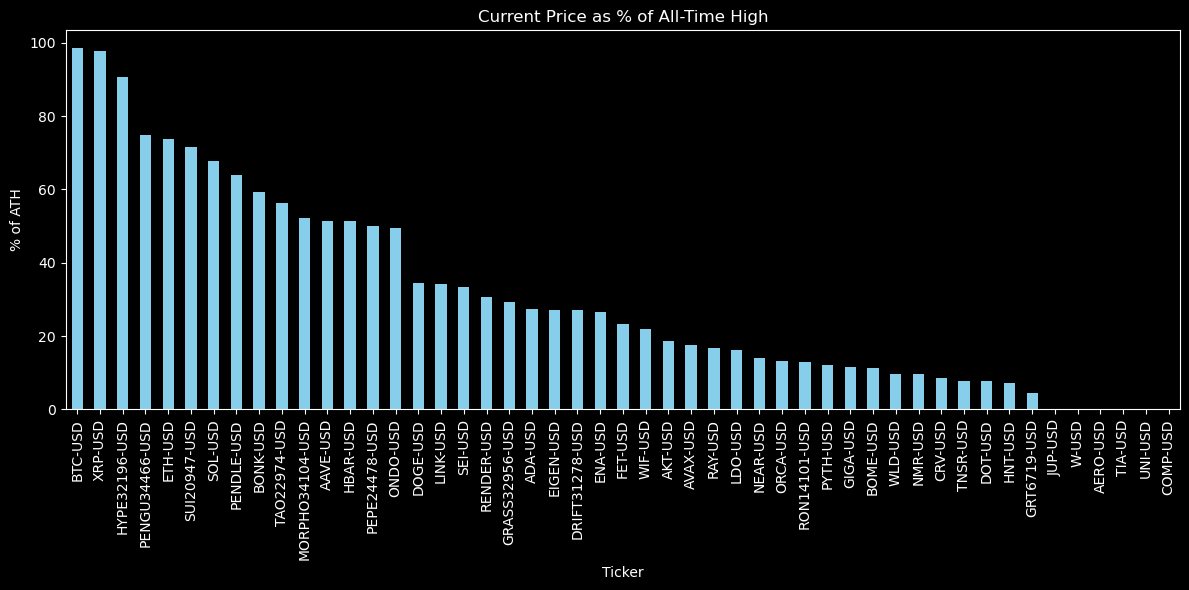

In [17]:
ath = prices.max()
# Calculate days since ATH for each ticker
days_since_ath = prices.index[-1] - prices.idxmax()
current = prices.iloc[-1]
ath_pct = (current / ath * 100).sort_values(ascending=False)
ath_table = pd.DataFrame({'Current Price': current, 'ATH': ath, 'Current/ATH (%)': ath_pct, 'Days since ATH': days_since_ath})

display(ath_table.sort_values('Current/ATH (%)', ascending=False))
plt.figure(figsize=(12,6))
ath_pct.plot(kind='bar', color='skyblue')
plt.title('Current Price as % of All-Time High')
plt.ylabel('% of ATH')
plt.tight_layout()
plt.show()

In [18]:
## 5. Rolling Sharpe Ratio Analysis

Calculate rolling Sharpe ratios across different time windows to identify momentum and risk-adjusted performance trends.

SyntaxError: invalid syntax (3638784964.py, line 3)

In [ ]:
# Calculate rolling Sharpe ratios for each window
rolling_sharpe = {}
for w in [7, 30, 90, 200, 365]:
    # Annualize return and volatility for window w
    roll_ann_return = prices.pct_change().rolling(window=w).mean() * 365
    roll_ann_vol = prices.pct_change().rolling(window=w).std() * np.sqrt(365)
    roll_sharpe = (roll_ann_return - risk_free_rate) / roll_ann_vol
    # Take the last available value for each ticker
    rolling_sharpe[w] = roll_sharpe.iloc[-1]

# Combine into a DataFrame
rolling_sharpe_table = pd.DataFrame(rolling_sharpe, index=prices.columns)
rolling_sharpe_table.columns = [f'Sharpe_{w}d' for w in [7, 30, 90, 200, 365]]

# Add average Sharpe across all windows
rolling_sharpe_table['Sharpe_Avg'] = rolling_sharpe_table.mean(axis=1, skipna=True)
rolling_sharpe_table = rolling_sharpe_table.sort_values('Sharpe_Avg', ascending=False)

print("Rolling Sharpe Ratios (Higher is Better):")
display(rolling_sharpe_table.style.format('{:.2f}'))

# Plot rolling Sharpe ratios
plt.figure(figsize=(14, 8))
rolling_sharpe_table[['Sharpe_7d', 'Sharpe_30d', 'Sharpe_90d', 'Sharpe_365d']].plot(kind='bar', width=0.8)
plt.title('Rolling Sharpe Ratios Across Different Time Windows')
plt.ylabel('Sharpe Ratio')
plt.xlabel('Cryptocurrency')
plt.legend(title='Time Window')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Calculate moving averages for price and volatility analysis
ma_windows = [7, 30, 90, 200, 365]

# Download volume data if not already present
try:
    volume = yf.download(list(crypto_tickers.values()), start=start_date, end=end_date)['Volume']
    volume = volume.ffill().dropna(how='all').dropna(axis=1, how='all')
except:
    print("Volume data not available for all tickers")
    volume = None

# Prepare dictionaries to store moving averages
price_ma = {}
vol_ma = {}

for w in ma_windows:
    price_ma[w] = prices.rolling(window=w).mean()
    vol_ma[w] = returns.rolling(window=w).std()

# Get latest values
current_price = prices.iloc[-1]
current_vol = returns.rolling(window=30).std().iloc[-1]  # 30-day rolling volatility

# Calculate ratios: current / moving average
price_rel_ma = pd.DataFrame(index=current_price.index)
vol_rel_ma = pd.DataFrame(index=current_vol.index)

for w in ma_windows:
    price_rel_ma[f'Price/MA{w}'] = current_price / price_ma[w].iloc[-1]
    vol_rel_ma[f'Vol/MA{w}'] = current_vol / vol_ma[w].iloc[-1]

# Combine price and volatility ratios
rel_ma = pd.concat([price_rel_ma, vol_rel_ma], axis=1)

print("Current Price vs Moving Averages (>1 = Above MA, <1 = Below MA):")
display(rel_ma.sort_values('Price/MA200', ascending=False).style.format('{:.2f}'))

# Plot price relative to 200-day MA
plt.figure(figsize=(12, 6))
price_rel_ma['Price/MA200'].sort_values(ascending=False).plot(kind='bar', color='lightcoral')
plt.title('Current Price vs 200-Day Moving Average')
plt.ylabel('Price / 200-Day MA')
plt.axhline(y=1, color='white', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\saris\AppData\Local\Temp\ipykernel_31324\2268662879.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  volume = yf.download(list(crypto_tickers.values()), start=start_date, end=end_date)['Volume']
[*********************100%***********************]  50 of 50 completed


NameError: name 'window' is not defined

## 6. Dominance Metrics Analysis

Calculate market dominance for Bitcoin, Ethereum, and other major cryptocurrencies based on market cap proxies.

In [ ]:
# Calculate dominance metrics using price as proxy for market cap
# Note: This is a simplified approach - real dominance would use actual market cap data

# Get latest prices for dominance calculation
latest_prices = prices.iloc[-1].dropna()

# Calculate relative weights (price-based proxy)
total_value = latest_prices.sum()
dominance = (latest_prices / total_value * 100).sort_values(ascending=False)

print("Crypto Dominance (Price-Based Proxy):")
dominance_df = pd.DataFrame({
    'Ticker': dominance.index,
    'Dominance (%)': dominance.values
})
display(dominance_df.head(10).style.format({'Dominance (%)': '{:.2f}%'}))

# Plot dominance pie chart for top 10
plt.figure(figsize=(10, 8))
top_10_dominance = dominance.head(10)
others = dominance.iloc[10:].sum()
if others > 0:
    top_10_dominance = pd.concat([top_10_dominance, pd.Series([others], index=['Others'])])

colors = plt.cm.Set3(np.linspace(0, 1, len(top_10_dominance)))
plt.pie(top_10_dominance.values, labels=top_10_dominance.index, autopct='%1.1f%%', 
        colors=colors, startangle=90)
plt.title('Cryptocurrency Dominance Distribution (Top 10)')
plt.axis('equal')
plt.tight_layout()
plt.show()

# Calculate BTC and ETH specific dominance
btc_dominance = dominance.get('BTC-USD', 0)
eth_dominance = dominance.get('ETH-USD', 0)
print(f"\nBTC Dominance: {btc_dominance:.2f}%")
print(f"ETH Dominance: {eth_dominance:.2f}%")
print(f"BTC + ETH Combined: {btc_dominance + eth_dominance:.2f}%")

## 7. Functional Group Analysis

Analyze performance by cryptocurrency functional groups: Layer 1s, DeFi, AI, Meme coins, etc.

In [ ]:
# Create reverse mapping from ticker to group
ticker_to_group = {}
for name, ticker in layer1_tickers.items():
    ticker_to_group[ticker] = 'Layer 1'
for name, ticker in defi_tickers.items():
    ticker_to_group[ticker] = 'DeFi'
for name, ticker in ai_tickers.items():
    ticker_to_group[ticker] = 'AI'
for name, ticker in meme_tickers.items():
    ticker_to_group[ticker] = 'Meme'
for name, ticker in oracle_tickers.items():
    ticker_to_group[ticker] = 'Oracle'
for name, ticker in other_tickers.items():
    ticker_to_group[ticker] = 'Other'

# Add group column to sharpe_table
sharpe_table['Group'] = sharpe_table.index.map(ticker_to_group)

# Calculate group statistics
group_stats = sharpe_table.groupby('Group').agg({
    'Ann. Return': ['mean', 'median', 'std'],
    'Ann. Volatility': ['mean', 'median', 'std'],
    'Sharpe Ratio': ['mean', 'median', 'std', 'count']
}).round(4)

print("Performance by Functional Group:")
display(group_stats)

# Plot group performance
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Sharpe ratio by group
group_sharpe = sharpe_table.groupby('Group')['Sharpe Ratio'].mean().sort_values(ascending=False)
group_sharpe.plot(kind='bar', ax=axes[0,0], color='lightblue')
axes[0,0].set_title('Average Sharpe Ratio by Group')
axes[0,0].set_ylabel('Sharpe Ratio')
axes[0,0].tick_params(axis='x', rotation=45)

# Return by group
group_returns = sharpe_table.groupby('Group')['Ann. Return'].mean().sort_values(ascending=False)
group_returns.plot(kind='bar', ax=axes[0,1], color='lightgreen')
axes[0,1].set_title('Average Annualized Return by Group')
axes[0,1].set_ylabel('Annualized Return')
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

# Volatility by group
group_vol = sharpe_table.groupby('Group')['Ann. Volatility'].mean().sort_values(ascending=True)
group_vol.plot(kind='bar', ax=axes[1,0], color='lightcoral')
axes[1,0].set_title('Average Annualized Volatility by Group')
axes[1,0].set_ylabel('Annualized Volatility')
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,0].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

# Box plot of Sharpe ratios by group
sharpe_table.boxplot(column='Sharpe Ratio', by='Group', ax=axes[1,1])
axes[1,1].set_title('Sharpe Ratio Distribution by Group')
axes[1,1].set_ylabel('Sharpe Ratio')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Top performers in each group
print("\nTop Performer in Each Group (by Sharpe Ratio):")
top_performers = sharpe_table.loc[sharpe_table.groupby('Group')['Sharpe Ratio'].idxmax()]
display(top_performers[['Group', 'Sharpe Ratio', 'Ann. Return', 'Ann. Volatility']].style.format({
    'Sharpe Ratio': '{:.2f}',
    'Ann. Return': '{:.2%}',
    'Ann. Volatility': '{:.2%}'
}))

## 8. Advanced Visualizations

Create comprehensive visualizations for portfolio insights and market analysis.

In [ ]:
# Create comprehensive risk-return scatter plot
plt.figure(figsize=(16, 10))

# Color map for groups
group_colors = {
    'Layer 1': 'blue',
    'DeFi': 'green', 
    'AI': 'red',
    'Meme': 'orange',
    'Oracle': 'purple',
    'Other': 'brown'
}

# Create scatter plot
for group in sharpe_table['Group'].unique():
    if pd.notna(group):
        group_data = sharpe_table[sharpe_table['Group'] == group]
        plt.scatter(group_data['Ann. Volatility'], group_data['Ann. Return'], 
                   c=group_colors.get(group, 'gray'), label=group, alpha=0.7, s=100)

plt.xlabel('Annualized Volatility')
plt.ylabel('Annualized Return')
plt.title('Risk-Return Profile by Functional Group')
plt.legend()
plt.grid(True, alpha=0.3)

# Add quadrant lines
plt.axhline(y=0, color='white', linestyle='--', alpha=0.5)
plt.axvline(x=sharpe_table['Ann. Volatility'].median(), color='white', linestyle='--', alpha=0.5)

# Format axes as percentages
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

plt.tight_layout()
plt.show()

# Correlation heatmap of top cryptocurrencies
top_cryptos = sharpe_table.head(15).index
corr_matrix = returns[top_cryptos].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', center=0, 
            square=True, fmt='.2f', cbar_kws={'label': 'Correlation'})
plt.title('Correlation Matrix: Top 15 Cryptocurrencies (by Sharpe Ratio)')
plt.tight_layout()
plt.show()

# Time series of cumulative returns for top performers
top_5_cryptos = sharpe_table.head(5).index
cumulative_returns = (1 + returns[top_5_cryptos]).cumprod()

plt.figure(figsize=(14, 8))
for crypto in top_5_cryptos:
    plt.plot(cumulative_returns.index, cumulative_returns[crypto], 
             label=crypto, linewidth=2, alpha=0.8)

plt.xlabel('Date')
plt.ylabel('Cumulative Return (Log Scale)')
plt.title('Cumulative Returns: Top 5 Cryptocurrencies by Sharpe Ratio')
plt.legend()
plt.yscale('log')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Rolling volatility analysis
rolling_vol = returns.rolling(window=30).std() * np.sqrt(365)
top_3_vol = sharpe_table.head(3).index

plt.figure(figsize=(14, 8))
for crypto in top_3_vol:
    plt.plot(rolling_vol.index, rolling_vol[crypto], 
             label=crypto, linewidth=2, alpha=0.8)

plt.xlabel('Date')
plt.ylabel('30-Day Rolling Volatility (Annualized)')
plt.title('Rolling Volatility: Top 3 Cryptocurrencies by Sharpe Ratio')
plt.legend()
plt.grid(True, alpha=0.3)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
plt.tight_layout()
plt.show()

## 9. Insights & Recommendations

Based on the comprehensive analysis, here are the key insights and portfolio recommendations.

In [ ]:
# Generate comprehensive insights and recommendations
print("=" * 60)
print("COMPREHENSIVE CRYPTOCURRENCY ANALYSIS INSIGHTS")
print("=" * 60)

# Top performers by Sharpe ratio
print("\n1. TOP RISK-ADJUSTED PERFORMERS (by Sharpe Ratio):")
top_sharpe = sharpe_table.head(5)
for i, (ticker, data) in enumerate(top_sharpe.iterrows(), 1):
    print(f"{i}. {ticker}: Sharpe={data['Sharpe Ratio']:.2f}, Return={data['Ann. Return']:.1%}, Vol={data['Ann. Volatility']:.1%}")

# Best performing groups
print("\n2. BEST PERFORMING FUNCTIONAL GROUPS:")
group_performance = sharpe_table.groupby('Group')['Sharpe Ratio'].mean().sort_values(ascending=False)
for i, (group, sharpe) in enumerate(group_performance.head(3).items(), 1):
    print(f"{i}. {group}: Average Sharpe = {sharpe:.2f}")

# Risk analysis
print("\n3. RISK ASSESSMENT:")
high_risk = sharpe_table[sharpe_table['Ann. Volatility'] > sharpe_table['Ann. Volatility'].quantile(0.75)]
low_risk = sharpe_table[sharpe_table['Ann. Volatility'] < sharpe_table['Ann. Volatility'].quantile(0.25)]
print(f"High Risk Assets (>75th percentile vol): {len(high_risk)} assets")
print(f"Low Risk Assets (<25th percentile vol): {len(low_risk)} assets")

# ATH analysis
print("\n4. ASSETS NEAR ALL-TIME HIGHS:")
near_ath = ath_table[ath_table['Current/ATH (%)'] > 80].sort_values('Current/ATH (%)', ascending=False)
print(f"Assets within 20% of ATH: {len(near_ath)} assets")
if len(near_ath) > 0:
    for ticker, data in near_ath.head(3).iterrows():
        print(f"  - {ticker}: {data['Current/ATH (%)']:.1f}% of ATH")

# Momentum analysis
print("\n5. MOMENTUM INDICATORS:")
momentum_positive = price_rel_ma[price_rel_ma['Price/MA200'] > 1.1]
momentum_negative = price_rel_ma[price_rel_ma['Price/MA200'] < 0.9]
print(f"Strong upward momentum (>10% above 200-day MA): {len(momentum_positive)} assets")
print(f"Strong downward momentum (<10% below 200-day MA): {len(momentum_negative)} assets")

# Portfolio recommendations
print("\n" + "=" * 60)
print("PORTFOLIO RECOMMENDATIONS")
print("=" * 60)

print("\n🏆 CORE HOLDINGS (40-50% allocation):")
core_holdings = sharpe_table[(sharpe_table['Group'] == 'Layer 1') & 
                           (sharpe_table['Sharpe Ratio'] > 0)].head(3)
for ticker, data in core_holdings.iterrows():
    print(f"  • {ticker} ({data['Group']}): Sharpe={data['Sharpe Ratio']:.2f}")

print("\n🚀 GROWTH POSITIONS (30-40% allocation):")
growth_positions = sharpe_table[(sharpe_table['Group'].isin(['AI', 'DeFi'])) & 
                              (sharpe_table['Sharpe Ratio'] > 0.5)].head(3)
for ticker, data in growth_positions.iterrows():
    print(f"  • {ticker} ({data['Group']}): Sharpe={data['Sharpe Ratio']:.2f}")

print("\n💎 SPECULATIVE PLAYS (10-20% allocation):")
speculative = sharpe_table[(sharpe_table['Group'] == 'Meme') & 
                         (sharpe_table['Sharpe Ratio'] > 0)].head(2)
for ticker, data in speculative.iterrows():
    print(f"  • {ticker} ({data['Group']}): Sharpe={data['Sharpe Ratio']:.2f}")

print("\n⚠️  RISK WARNINGS:")
print("• High volatility environment - use position sizing")
print("• Diversify across functional groups")
print("• Monitor momentum indicators regularly")
print("• Consider dollar-cost averaging for entries")

print("\n📈 NEXT STEPS:")
print("1. Implement position sizing based on volatility")
print("2. Set up automated rebalancing")
print("3. Monitor correlation changes")
print("4. Track regulatory developments")

# Create a summary table for easy reference
summary_data = {
    'Ticker': [],
    'Group': [],
    'Sharpe_Ratio': [],
    'Ann_Return': [],
    'Ann_Volatility': [],
    'Recommendation': []
}

# Add top performers to summary
for ticker, data in sharpe_table.head(10).iterrows():
    summary_data['Ticker'].append(ticker)
    summary_data['Group'].append(data['Group'])
    summary_data['Sharpe_Ratio'].append(data['Sharpe Ratio'])
    summary_data['Ann_Return'].append(data['Ann. Return'])
    summary_data['Ann_Volatility'].append(data['Ann. Volatility'])
    
    # Assign recommendation based on Sharpe ratio and group
    if data['Sharpe Ratio'] > 1.0 and data['Group'] == 'Layer 1':
        rec = 'CORE'
    elif data['Sharpe Ratio'] > 0.5 and data['Group'] in ['AI', 'DeFi']:
        rec = 'GROWTH'
    elif data['Group'] == 'Meme' and data['Sharpe Ratio'] > 0:
        rec = 'SPECULATIVE'
    else:
        rec = 'MONITOR'
    summary_data['Recommendation'].append(rec)

summary_df = pd.DataFrame(summary_data)
print("\n" + "=" * 80)
print("PORTFOLIO ALLOCATION SUMMARY")
print("=" * 80)
display(summary_df.style.format({
    'Sharpe_Ratio': '{:.2f}',
    'Ann_Return': '{:.1%}',
    'Ann_Volatility': '{:.1%}'
}))